In [231]:
from models import LanguageModel
from utils import Numerizer
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

In [232]:
model = torch.load("./best_lang.pt", map_location='cpu').word_embeds

/home/julia/.local/lib/python3.6/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'models.LanguageModel' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/julia/.local/lib/python3.6/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'models.WordEmbedder' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/julia/.local/lib/python3.6/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'models.SentenceEmbedder' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.M

In [233]:
def word_to_vectors(words):
    n = Numerizer()
    numerized = [n.numerize_word(w) for w in words]
    max_len = max([len(w) for w in numerized])      
    t = torch.zeros(len(numerized), max_len).long()
    for w_idx, w in enumerate(numerized):
        t[w_idx, :len(w)] = torch.LongTensor(w)
    
    embeds = model(t)
    return embeds.detach()

In [234]:
def flatten(lst):
    return [w for ww in lst for w in ww]

In [235]:


def tsne_plot(words, **kwargs):
    flat = [w for ww in words for w in ww]
    vectors = word_to_vectors(flat)

    c = [[i]*len(l) for i, l in enumerate(words)]
    c = [a for b in c for a in b]

    transformed = TSNE(**kwargs).fit_transform(vectors)

    x = transformed[:,0]
    y = transformed[:,1]

    plt.scatter(x, y, c=c)
    for i, txt in enumerate(flat):
        plt.annotate(txt, (x[i], y[i]))

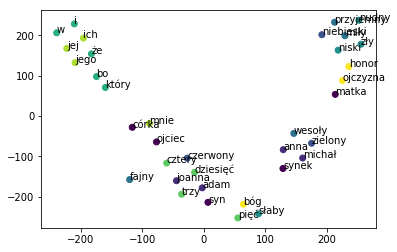

In [269]:
words = [ 
        ["ojciec", "matka", "syn", "córka", "synek"], 
        ["anna", "joanna", "adam", "michał"],
        ["niebieski", "zielony", "czerwony"],  
        ["fajny", "miły", "wesoły", "przyjemny"],
        ["nudny", "zły", "niski", "słaby"],
        ["bo", "i", "że", "który", "w"],
        ["trzy", "cztery", "pięć", "dziesięć"],
        ["jej", "jego", "ich", "mnie"],
        ["bóg", "honor", "ojczyzna"]
        ]
tsne_plot(words, perplexity=6, learning_rate=200)

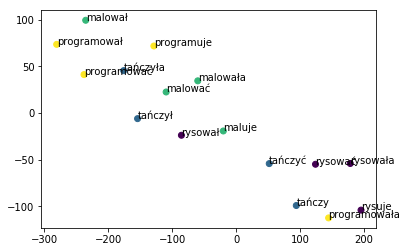

In [244]:
czasowniki = [        
    ["rysować", "rysował", "rysowała", "rysuje"],
    ["tańczyć", "tańczył", "tańczyła", "tańczy"],
    ["malować", "malował", "malowała", "maluje"],
    ["programować", "programował", "programowała", "programuje"],
]

tsne_plot(czasowniki, perplexity=7)
    